In [1]:
!pip install xgboost

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('train-weather.csv')
df_test = pd.read_csv('test-weather.csv')

In [4]:
df_train.head()

,month,year,ID,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
0,11,2022,1323,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9,clear-day
1,12,2022,1362,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7,clear-day
2,3,2022,1079,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8,partly-cloudy-day
3,5,2022,1148,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3,clear-day
4,11,2023,1694,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1,rain


In [32]:
df_test.head()

,month,year,ID,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
0,5,2022,1137,100.5,71.5,85.3,61.1,50.5,17.4,13.9,276.5,1006.1,18.6,6.4,316.5,27.2
1,7,2022,1198,75.3,70.1,73.2,71.6,94.9,25.7,16.1,259.9,1006.3,98.3,4.1,23.7,2.0
2,1,2024,1739,86.1,65.6,74.1,58.0,59.6,15.0,9.4,78.2,1015.1,18.0,10.8,208.7,18.1
3,8,2023,1583,80.7,70.4,74.4,69.5,85.1,33.8,23.5,257.2,1005.5,88.1,11.4,204.2,17.7
4,10,2023,1655,87.2,71.0,77.9,62.5,60.7,15.4,10.5,25.1,1013.2,46.9,11.9,200.3,17.3


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              634 non-null    int64  
 1   year               634 non-null    int64  
 2   ID                 634 non-null    int64  
 3   tempmax            634 non-null    float64
 4   tempmin            634 non-null    float64
 5   temp               634 non-null    float64
 6   dew                634 non-null    float64
 7   humidity           634 non-null    float64
 8   windgust           627 non-null    float64
 9   windspeed          634 non-null    float64
 10  winddir            634 non-null    float64
 11  sealevelpressure   634 non-null    float64
 12  cloudcover         634 non-null    float64
 13  visibility         634 non-null    float64
 14  solarradiation     634 non-null    float64
 15  solarenergy        634 non-null    float64
 16  weather-condition  634 non

In [7]:
df_train['weather-condition'].value_counts()

rain                 244
clear-day            237
partly-cloudy-day    153
Name: weather-condition, dtype: int64

<Axes: >

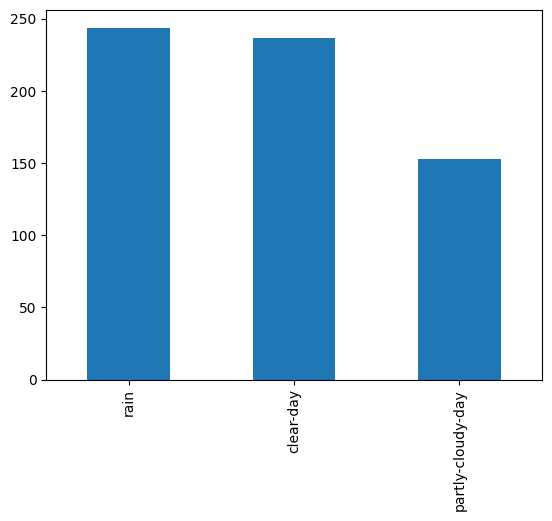

In [8]:
df_train['weather-condition'].value_counts().plot(kind='bar')

In [13]:
#encoding weather-condition to numerics
weather_classify = {'weather-condition': {'rain':0, 'clear-day':1, 'partly-cloudy-day':2}}
df_train.replace(weather_classify, inplace=True)

In [14]:
df_train.head()

,month,year,ID,tempmax,tempmin,temp,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,weather-condition
0,11,2022,1323,79.9,50.1,65.3,41.5,46.2,18.6,13.9,81.0,1014.2,4.9,9.3,230.0,19.9,1
1,12,2022,1362,89.6,50.1,71.6,50.1,50.6,11.2,10.3,285.4,1018.2,4.3,7.1,214.8,18.7,1
2,3,2022,1079,95.1,69.9,81.9,44.3,30.1,19.7,9.2,308.5,1009.9,61.7,6.5,240.5,20.8,2
3,5,2022,1148,93.3,72.6,81.7,66.2,61.8,27.1,20.8,264.7,1007.7,19.6,7.8,315.2,27.3,1
4,11,2023,1694,85.4,67.4,73.5,62.9,71.2,18.8,15.2,158.2,1012.0,70.9,10.2,139.4,12.1,0


In [20]:
df_train = df_train.rename(columns={'weather-condition': 'weather_condition'})

In [ ]:
df_train

In [22]:
corr = df_train.corr()
corr.weather_condition.sort_values(ascending=False)

weather_condition    1.000000
sealevelpressure     0.460994
solarradiation       0.419876
solarenergy          0.417504
tempmax              0.361208
visibility           0.205959
year                 0.106852
temp                 0.064955
ID                   0.011233
month               -0.201732
winddir             -0.249650
windgust            -0.287668
windspeed           -0.321104
tempmin             -0.324279
cloudcover          -0.517652
dew                 -0.568966
humidity            -0.642768
Name: weather_condition, dtype: float64

<Axes: >

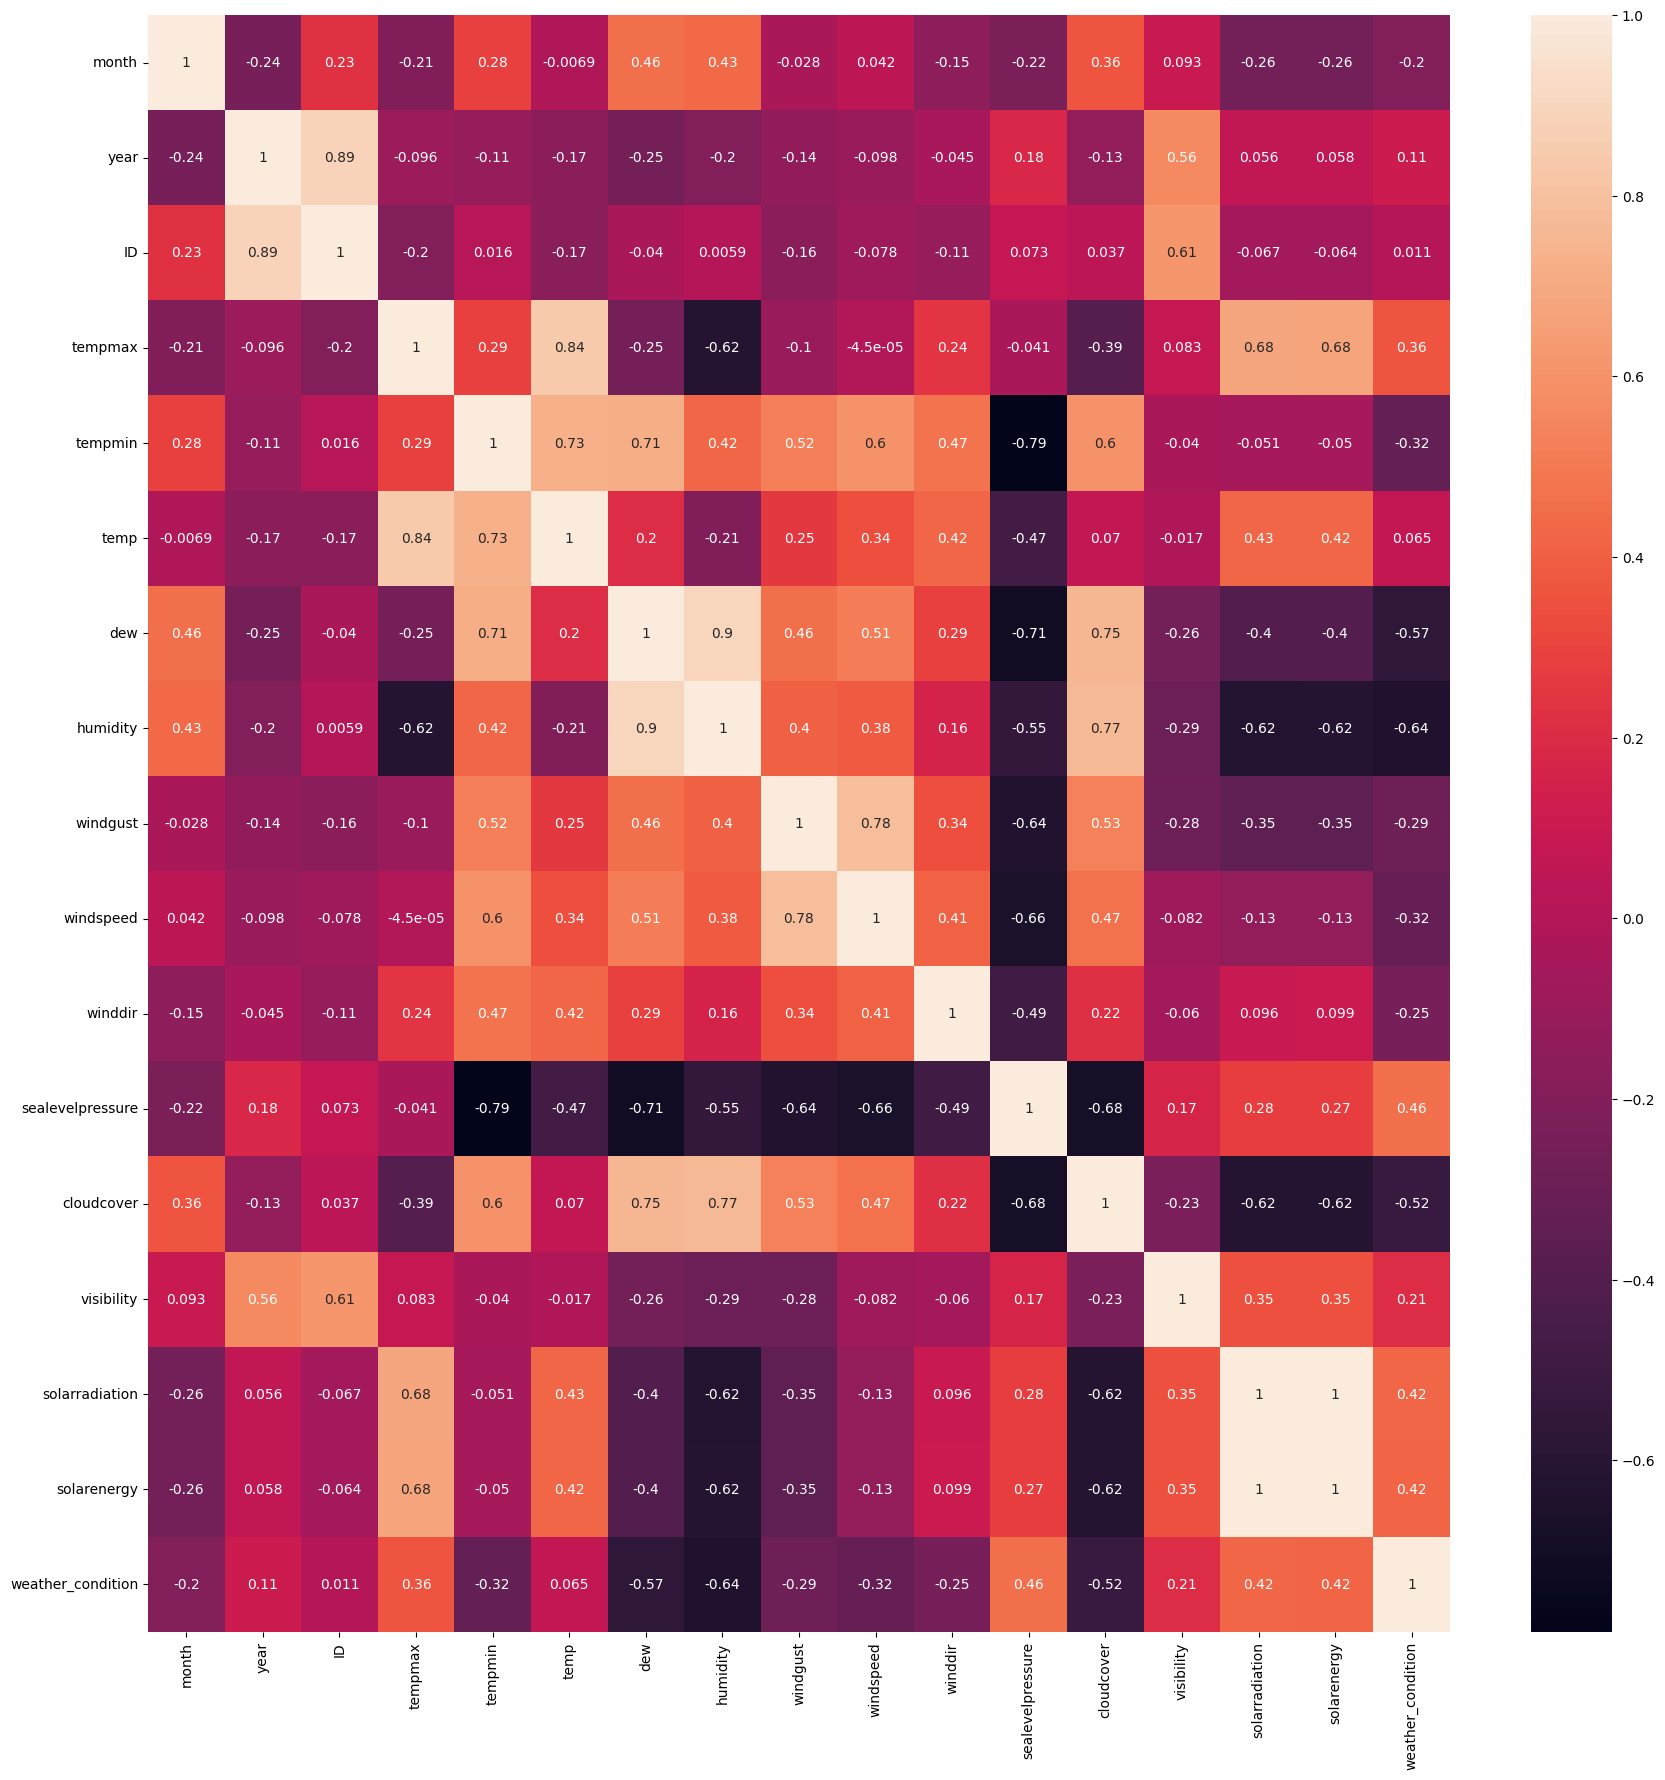

In [23]:
plt.figure(figsize=(21,21))
sns.heatmap(corr, annot=True)

<Axes: xlabel='weather_condition', ylabel='sealevelpressure'>

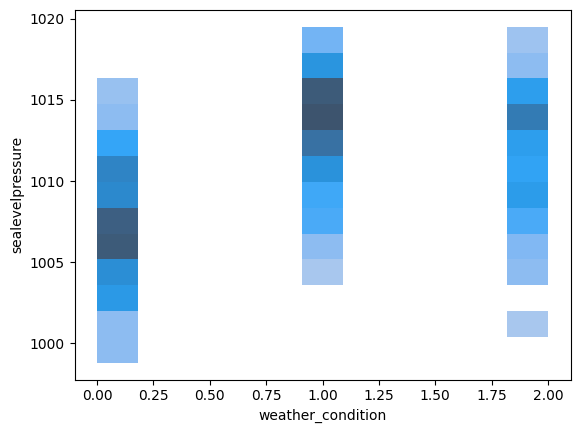

In [24]:
sns.histplot(x=df_train.weather_condition, y=df_train.sealevelpressure,data=df_train)

In [25]:
#split data
x = df_train.drop(['weather_condition'],axis=1)
y = df_train.weather_condition
print(x)
print(y)

     month  year    ID  tempmax  tempmin  temp   dew  humidity  windgust  \
0       11  2022  1323     79.9     50.1  65.3  41.5      46.2      18.6   
1       12  2022  1362     89.6     50.1  71.6  50.1      50.6      11.2   
2        3  2022  1079     95.1     69.9  81.9  44.3      30.1      19.7   
3        5  2022  1148     93.3     72.6  81.7  66.2      61.8      27.1   
4       11  2023  1694     85.4     67.4  73.5  62.9      71.2      18.8   
..     ...   ...   ...      ...      ...   ...   ...       ...       ...   
629      3  2022  1071     93.3     60.9  78.1  39.4      29.3      11.4   
630      4  2022  1106    100.5     66.8  84.9  47.5      31.3      22.1   
631      9  2022  1270     84.3     69.2  75.6  70.0      83.5       8.9   
632      3  2023  1435     93.3     60.9  79.2  45.9      34.6      15.4   
633      4  2022  1102    102.3     76.9  88.9  39.2      18.7      25.5   

     windspeed  winddir  sealevelpressure  cloudcover  visibility  \
0         13.9    

In [26]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=42)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((507, 16), (127, 16), (507,), (127,))

In [27]:
import xgboost as xgb

model_t = xgb.XGBClassifier()
model_t.fit(Xtrain, Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
y_pred = model_t.predict(Xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred, Ytest))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       1.00      0.96      0.98        46
           2       0.92      0.83      0.87        29

    accuracy                           0.93       127
   macro avg       0.93      0.92      0.92       127
weighted avg       0.93      0.93      0.93       127



<Axes: >

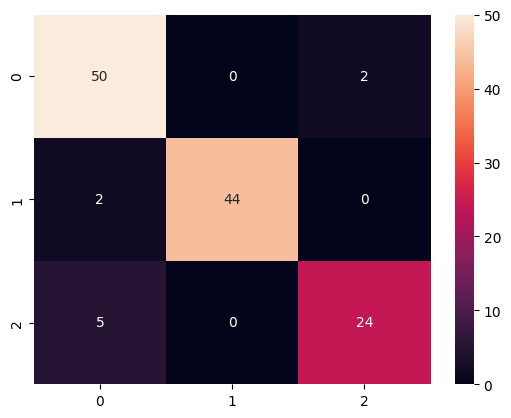

In [29]:
sns.heatmap(confusion_matrix(y_pred, Ytest), annot=True)

In [45]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

param_grid = {
    'colsample_bytree': [0.8],
    'gamma': [0.1],
    'learning_rate': [0.2],
    'max_depth': [7],
    'min_child_weight': [5],
    'reg_alpha': [1.0],
    'subsample': [1.0]
}

In [47]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import GridSearchCV

# Assuming df_test is already defined with the required columns
X_test_ID_remove = df_test.copy()

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

param_grid = {
    'colsample_bytree': [0.8],
    'gamma': [0.1],
    'learning_rate': [0.2],
    'max_depth': [7],
    'min_child_weight': [5],
    'reg_alpha': [1.0],
    'subsample': [1.0]
}

# Using X_train and Y_train (assuming you have defined them)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=3)
grid_search.fit(Xtrain, Ytrain)

print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

# Creating a new XGBoost model with the best parameters
best_xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **grid_search.best_params_)

# Training the model on the entire training dataset
best_xgb_model.fit(Xtrain, Ytrain)

# Making predictions on the test set
y_pred = best_xgb_model.predict(X_test_ID_remove)

# Creating a submission DataFrame
submission_df = pd.DataFrame({'ID': df_test['ID'], 'weather-condition': y_pred})

# Saving the submission file
submission_df.to_csv('Hoang-submission.csv', index=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=nan total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=nan total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=nan total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=nan total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=nan total time=   0.3s
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5, 'reg_alpha': 1.0, 'subsample': 1.0}
Best AUC Score: nan


In [48]:
fileTest = pd.read_csv('Hoang-submission.csv')
fileTest

,ID,weather-condition
0,1137,1
1,1198,0
2,1739,1
3,1583,0
4,1655,2
...,...,...
154,1737,0
155,1760,2
156,1541,0
157,1375,1


In [49]:
#{'weather-condition': {'rain':0, 'clear-day':1, 'partly-cloudy-day':2}}
encode_back = {'weather-condition':{0:'rain',1:'clear-day',2:'partly-cloudy-day'}}
fileTest.replace(encode_back, inplace=True)

In [51]:
fileTest.to_csv('Hoang-submission-modify.csv',index=False)